In [16]:
import netCDF4
import matplotlib.collections
import matplotlib.lines
import matplotlib.pyplot as plt

In [17]:
filename = '/Users/fedorbaart/Documents/checkouts/cases_unstruc/e00_unstruc/f02_1D2D/c086_Index4/input/index4b_net.nc'
filename = '/Users/baart_f/models/riomagdelena/DFM_OUTPUT_riomagp_q2600/riomagp_q2600_map.nc'

In [18]:
ds = netCDF4.Dataset(filename)
X = ds.variables['NetNode_x'][:]
Y = ds.variables['NetNode_y'][:]
Z = ds.variables['NetNode_z'][:]
netelemnode = ds.variables['NetElemNode'][:]
netlink = ds.variables['NetLink'][:]
ds.close()

This is an example of how to use the elemnode variable to connect the cells. 

In [19]:
# Create split locations
if not hasattr(netelemnode, 'mask'):
    netelemnode = np.ma.masked_array(netelemnode, mask=False)
splitidx = np.cumsum(np.r_[(~netelemnode.mask).sum(1)][:-1])
# Convert to 1d filled idx
idx = netelemnode[(~netelemnode.mask)]-1
xpoly = np.split(X[idx],splitidx) # x vector per poly
ypoly = np.split(Y[idx],splitidx)
zcell = np.split(Z[idx],splitidx)
zcellmean = np.array([z.mean() for z in zcell])
polycoords = [np.c_[xy[0],xy[1]] for xy in np.c_[xpoly,ypoly]]


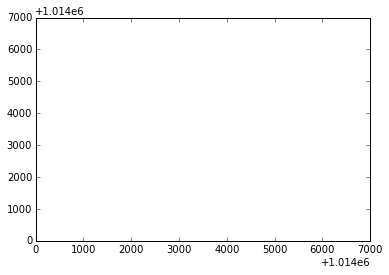

In [21]:
fig, ax = plt.subplots(1,1)
# Plot the cells as polygons
polys = matplotlib.collections.PolyCollection(polycoords, linewidth=2, edgecolor=(0.5,0.5,0.5), cmap=matplotlib.cm.Accent)
# Show the number of elements
polys.set_array((~netelemnode.mask).sum(1))
ax.add_collection(polys)
ax.autoscale()
# Add nodes manually so they don't scale... (could just use ax.plot)
nodes = matplotlib.lines.Line2D(X, Y, marker='.', linestyle='none', markerfacecolor='black', markeredgecolor='none')
ax.add_line(nodes)


This is an example of how to use the netlink variable to connect the links. 

In [23]:
# dimension n lines, start, stop
linecoords = np.concatenate([X[netlink-1][...,np.newaxis], Y[netlink-1][...,np.newaxis]], axis=2)

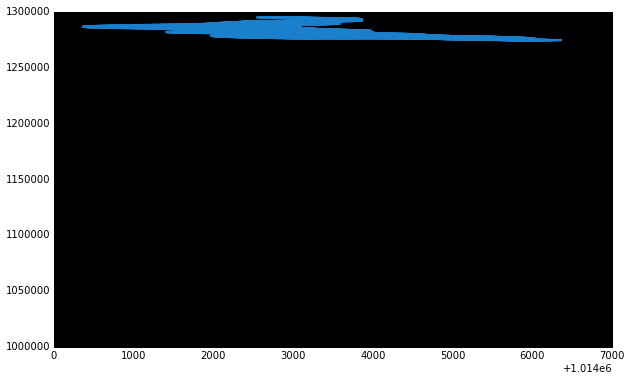

In [24]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
# Black is the new purple
ax.set_axis_bgcolor('black')

# Regenerate the polycollection in a different color
polys = matplotlib.collections.PolyCollection(polycoords, linewidth=0,cmap=matplotlib.cm.Pastel2)
polys.set_array((~netelemnode.mask).sum(1))
ax.add_collection(polys)

# Now add the lines on top
lines = matplotlib.collections.LineCollection(linecoords, linewidth=2, edgecolor=(0.1,0.5,0.8))
ax.add_collection(lines)
ax.autoscale()